<h1 align='center'>
    ________________________________________________________________________________________________________________________<br>
    Титаник<br>
    ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾<br>
</h1>
<p><font size='+1'>Краткое описание переменных:</font></p>
<ul><font>
    <li>PassengerId - уникальный номер каждого пассажира</li>
    <li>Survived - <strong>целевая переменная</strong>, указывающая на то выжил пассажир (1) или нет (0)</li>
    <li>Pclass - класс пассажира (социально-экономический статус)</li>
    <li>Name - имя пассажира</li>
    <li>Sex - пол</li>
    <li>Age - возраст. <strong>Содержит много пропущенных значений</strong></li>
    <li>SibSp - сумма количества братьев, сестер и супругов на борту</li>
    <li>Parch - сумма количества детей и родителей на борту</li>
    <li>Ticket - номер билета</li>
    <li>Fare - траты пассажира</li>
    <li>Cabin - номер каюты</li>
    <li>Embarked - пункт отправления. Явно это не сказано, но значения соответствуют маршруту титаника: S - Southampton, C - Cherbourg, Q - Queenstown </li>
</font></ul>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import lognorm, shapiro, kstest, chi2_contingency, mannwhitneyu
import statsmodels.api as sm

import warnings

warnings.filterwarnings('ignore')
sns.set(context='notebook', style='whitegrid', palette='pastel', 
        font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [2]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
print("Доля пропущенных значений в колонке:")
for i in data.columns:
    print(f"\t{i}: {len(data[data[i].isna()])/len(data)}")

Доля пропущенных значений в колонке:
	PassengerId: 0.0
	Survived: 0.0
	Pclass: 0.0
	Name: 0.0
	Sex: 0.0
	Age: 0.19865319865319866
	SibSp: 0.0
	Parch: 0.0
	Ticket: 0.0
	Fare: 0.0
	Cabin: 0.7710437710437711
	Embarked: 0.002244668911335578


<br><br>
<h2>Выживаемость</h2>

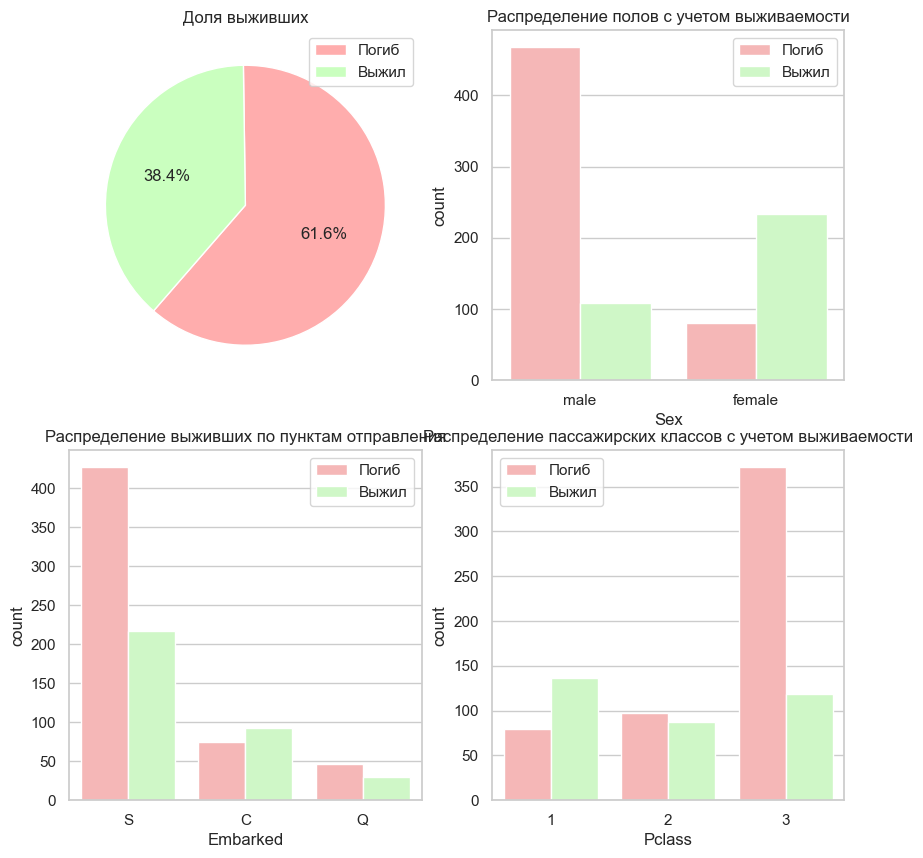

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0][0].pie(x=data.groupby(by='Survived').count()['PassengerId'], colors=['#ffadad', '#caffbf'], autopct='%1.1f%%',
        rotatelabels =True, startangle=229)
ax[0][0].set_title('Доля выживших')
ax[0][0].legend(labels=['Погиб', 'Выжил'])

sns.countplot(data=data, x='Sex', hue='Survived', ax=ax[0][1], palette=['#ffadad', '#caffbf'])
ax[0][1].legend(['Погиб', 'Выжил'])
ax[0][1].set_title('Распределение полов с учетом выживаемости')

sns.countplot(data=data, x='Embarked', hue='Survived', ax=ax[1][0], palette=['#ffadad', '#caffbf'])
ax[1][0].legend(['Погиб', 'Выжил'])
ax[1][0].set_title('Распределение выживших по пунктам отправления')

sns.countplot(data=data, x='Pclass', hue='Survived', ax=ax[1][1], palette=['#ffadad', '#caffbf'])
ax[1][1].legend(['Погиб', 'Выжил'])
ax[1][1].set_title('Распределение пассажирских классов с учетом выживаемости')

plt.show()

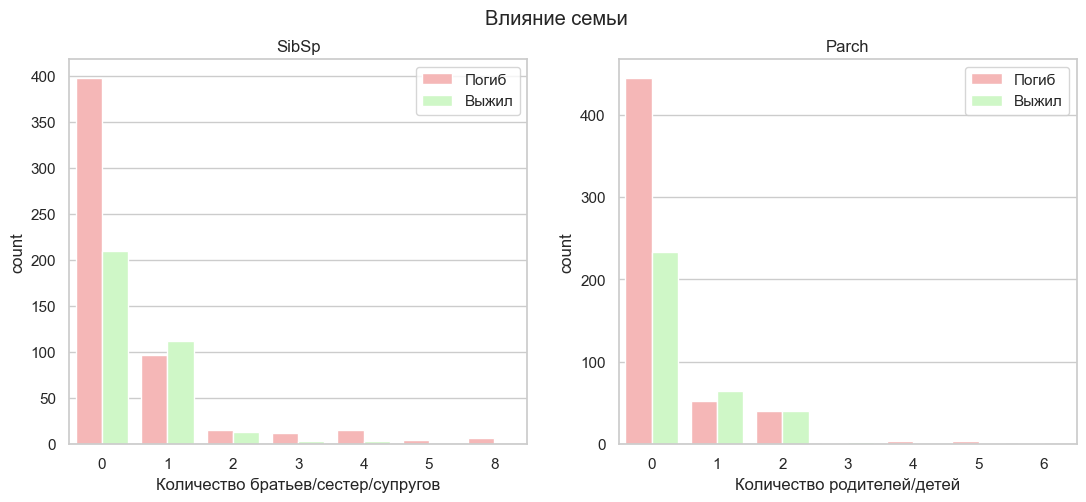

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('Влияние семьи')

sns.countplot(data=data, x='SibSp', hue='Survived', ax=ax[0], palette=['#ffadad', '#caffbf'])
ax[0].set_title('SibSp')
ax[0].legend(loc='upper right', labels=['Погиб', 'Выжил'])
ax[0].set_xlabel('Количество братьев/сестер/супругов')

sns.countplot(data=data, x='Parch', hue='Survived', ax=ax[1], palette=['#ffadad', '#caffbf'])
ax[1].set_title('Parch')
ax[1].legend(loc='upper right', labels=['Погиб', 'Выжил'])
ax[1].set_xlabel('Количество родителей/детей')

plt.show()

In [7]:
print("Доля выживших среди мужчин, отплывших из пукта Q:  ", end='')
print(data[(data['Embarked'] == 'Q') & (data['Sex'] == 'male')]['Survived'].mean())
print("Доля выживших среди мужчин, отплывших НЕ из пукта Q:  ", end='')
print(data[(data['Embarked'] != 'Q') & (data['Sex'] == 'male')]['Survived'].mean())

Доля выживших среди мужчин, отплывших из пукта Q:  0.07317073170731707
Доля выживших среди мужчин, отплывших НЕ из пукта Q:  0.19776119402985073


<h3>Результаты по блоку:</h3>
<ol>
    <li>Дисбаланс выборки: погибших почти в два раза больше, чем выживших.</li>
    <li>Видно, что женщины выживают значительно чаще, чем мужчины.</li>
    <li>Большая часть тех, кто садился в пункте "С" выжили. Этот момент интересный и требует дополнительного исследования. Стоит отметить, что Титаник следовал по маршруту Southampton-Cherbourg-Queenstown, значит у отплывших из пункта Q шанс выжить ниже, ведь они точно участвовали в крушении (это подтвеждается результатом из предыдущего блока).</li>
    <li>Чем ниже класс пассажира, тем меньше у него шанс выжить. Это ожидаемо и, скорее всего, связано с тем, что бедные пассажиры проживали в нижних отсеках корабля, откуда выбраться было значительно труднее.</li>
</ol>

<br><br> 
<h2>Возраст</h2>

In [8]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
print(f'Доля пропущенных значений в колонке Age:     {len(data[data["Age"].isna()]) / len(data)}')
print(f'Выживаемость среди пассажиров с пропущенным значением в колонке Age:\
    {round(data[data["Age"].isna()]["Survived"].mean() * 100, 2)}%')

Доля пропущенных значений в колонке Age:     0.19865319865319866
Выживаемость среди пассажиров с пропущенным значением в колонке Age:    29.38%


<p style='color:red'><strong>С пропущенными значениями нужно что-то делать, их слишком много, а информации не дают</strong></p>
<p style='color:green'><strong>(Изменено) Исправлено в дальнейшем решении</strong></p>

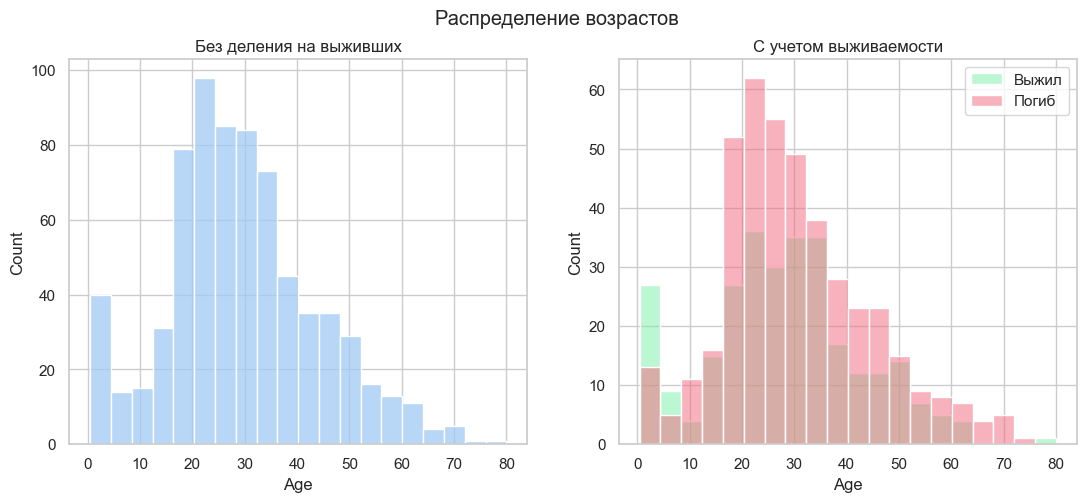

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('Распределение возрастов')

sns.histplot(data, x='Age', ax=ax[0])
ax[0].set_title('Без деления на выживших')

sns.histplot(data, x='Age', hue='Survived', ax=ax[1], palette=['#f3677c', '#7bf1a8'])
ax[1].set_title('С учетом выживаемости')
ax[1].legend(labels=['Выжил', 'Погиб'])

plt.show()

In [11]:
print(f'Проверка признака Age на нормальность')
print(f"\t Количество наблюдений {len(data['Age'].dropna())}")
print('\t', shapiro(data['Age'].dropna()))  # В документации к библиотеке сказано, что тест неточен для выборок 
print('\np-value < 0.05, значит данные распределены не нормально')

Проверка признака Age на нормальность
	 Количество наблюдений 714
	 ShapiroResult(statistic=0.981458306312561, pvalue=7.340329943872348e-08)

p-value < 0.05, значит данные распределены не нормально


<h3>Результаты по блоку:</h3>
<ol>
    <li>Дети до 10 лет выживают значительно чаще, чем остальные пассажиры</li>
    <li>Пропущенные значения не сильно коррелируют с выживаемостью (но нужно провести тесты, например, Т-тест)</li>
    <li>Пропущенных значений очень много</li>
</ol>

<br><br>
<h2>Траты</h2>

In [12]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare'>

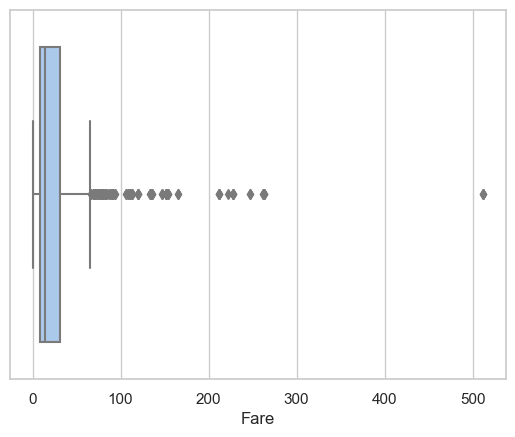

In [13]:
sns.boxplot(data['Fare'])

<p><font size='+1'>Визуально распределение похоже на логнормальное</font></p>

In [14]:
print('Доля выживших среди "сверхбогатых":  ', end='')
print(len(data[(data['Fare'] > 100) & (data['Survived'] == 1)]) / len(data[data['Fare'] > 100]))

Доля выживших среди "сверхбогатых":  0.7358490566037735


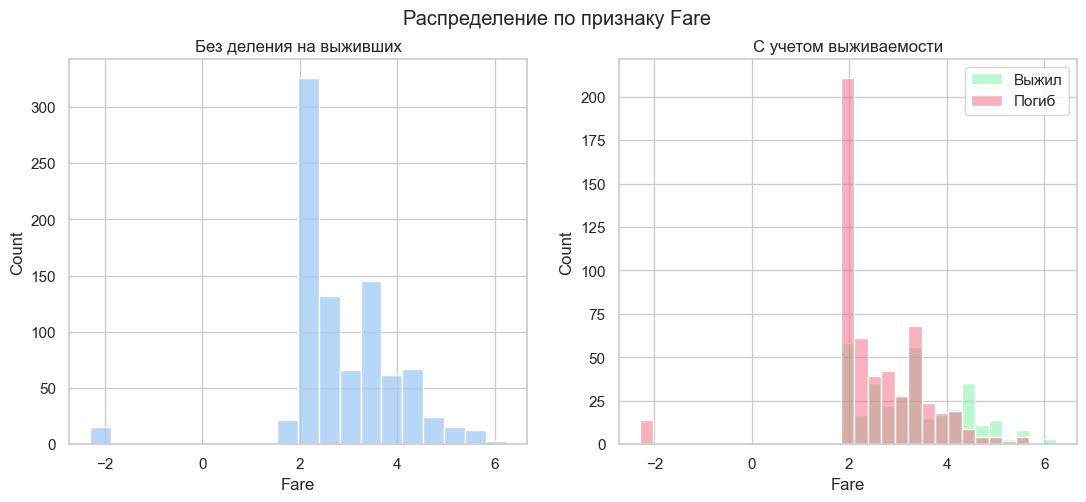

In [15]:
t = data.copy()
t['Fare'] = np.log(t['Fare']+1)  # 1 прибавляется для того, чтобы не исключались пассажиров с Fare = 0
nbins = 20

fig, ax = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('Распределение по признаку Fare')

sns.histplot(t, x='Fare', ax=ax[0], bins=nbins)
ax[0].set_title('Без деления на выживших')

sns.histplot(t, x='Fare', hue='Survived', ax=ax[1], palette=['#f3677c', '#7bf1a8'])
ax[1].set_title('С учетом выживаемости')
ax[1].legend(labels=['Выжил', 'Погиб'])

plt.show()
del t

In [16]:
data[data['Parch'] > 2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S


<h3>Результаты по блоку:</h3>
<ol>
    <li>Богатые выживают чаще, однако стоит проверить связь с другими признаками (возможно, например, среди богатых значительно больше женщин).</li>
    <li>Пассажиров с низкими тратами очень много. Это не сильно удивительно, ведь компания "White Star Line", которой принадлежало судно, ориентировалось на пассажирова третьего и второго класса.</li>
    <li>Интерес также вызывают люди с нулевыми тратами. Они все мужчины, следовавшие из пункта S. Примечательно, что единственный выживший из 15ти был пассажиром 3го класса.</li>
</ol>

<br><br>
<h2>Пол</h2>

На графике распределения выше видно, что мужчины значительно чаще погибали, в то время как среди женщин выжили почти 75%. Осталось это подтвердить тестом независимости Хи-квадрат

In [17]:
print('Результат теста независимости Хи-квадрат')
print(f"p-value = {chi2_contingency(pd.crosstab(data['Sex'], data['Survived']).values)[1]} < 0.05, значит принимаем альтернативную гипотезу о том, что признаки зависимы")

Результат теста независимости Хи-квадрат
p-value = 1.1973570627755645e-58 < 0.05, значит принимаем альтернативную гипотезу о том, что признаки зависимы


Теперь нужно посмотреть, с какими признаками также признак Sex в зависимости, чтобы минимизировать влияние мультиколлинеарности

In [18]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

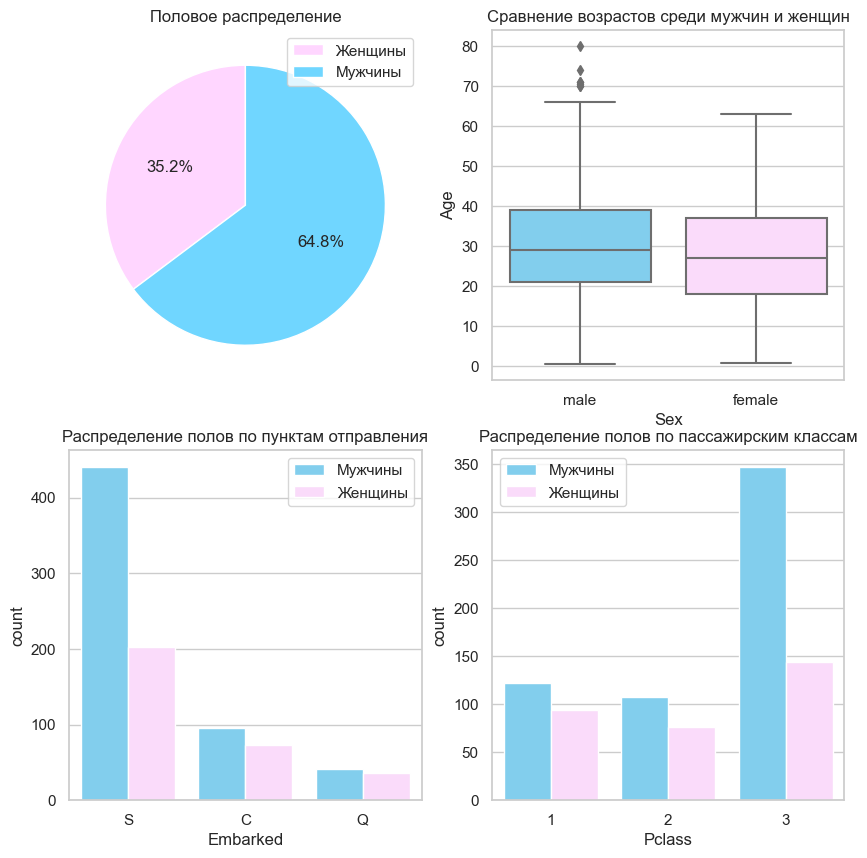

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0][0].pie(x=data.groupby(by='Sex').count()['PassengerId'], colors=['#ffd6ff', '#70d6ff'], autopct='%1.1f%%',
        rotatelabels =True, startangle=90)
ax[0][0].set_title('Половое распределение')
ax[0][0].legend(labels=['Женщины', 'Мужчины'])

sns.countplot(data=data, x='Embarked', hue='Sex', ax=ax[1][0], palette=['#70d6ff', '#ffd6ff'])
ax[1][0].legend(['Мужчины', 'Женщины'])
ax[1][0].set_title('Распределение полов по пунктам отправления')

sns.countplot(data=data, x='Pclass', hue='Sex', ax=ax[1][1], palette=['#70d6ff', '#ffd6ff'])
ax[1][1].legend(['Мужчины', 'Женщины'])
ax[1][1].set_title('Распределение полов по пассажирским классам')

sns.boxplot(data=data, y='Age', x='Sex', ax=ax[0][1], palette=['#70d6ff', '#ffd6ff'])
ax[0][1].set_title('Сравнение возрастов среди мужчин и женщин')

plt.show()

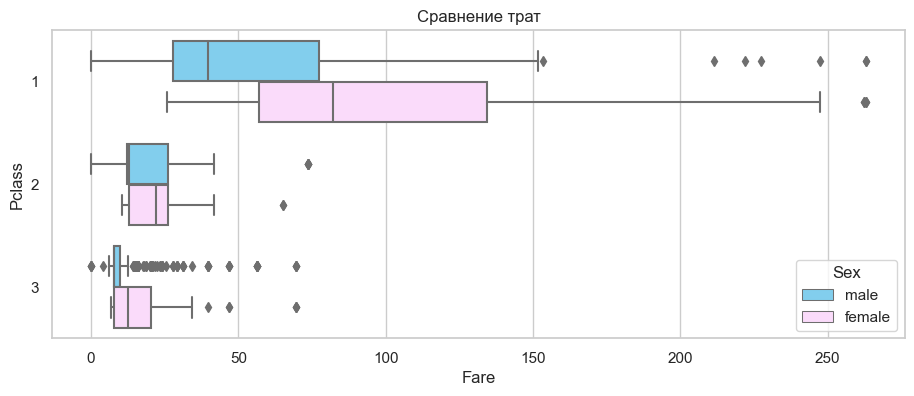

In [20]:
plt.figure(figsize=(11, 4))
sns.boxplot(data=data[data['Fare'] < 300], x='Fare', y='Pclass', hue='Sex', orient='h', palette=['#70d6ff', '#ffd6ff'])
plt.title('Сравнение трат')
plt.show()

In [21]:
print('Результат теста независимости Хи-квадрат')
print(f"p-value = {chi2_contingency(pd.crosstab(data['Sex'], data['Pclass']).values)[1]} < 0.05, значит принимаем альтернативную гипотезу о том, что пол и пассажирский класс зависимы")
print(f"p-value = {chi2_contingency(pd.crosstab(data['Sex'], data['Embarked']).values)[1]} < 0.05, значит принимаем альтернативную гипотезу о том, что пол и пункт отправления зависимы")

Результат теста независимости Хи-квадрат
p-value = 0.00020638864348233114 < 0.05, значит принимаем альтернативную гипотезу о том, что пол и пассажирский класс зависимы
p-value = 0.0012585245232290144 < 0.05, значит принимаем альтернативную гипотезу о том, что пол и пункт отправления зависимы


<h3><strong>Результаты по блоку:</strong></h3>
<ol>
    <li>Женщины тратят больше, чем мужчины</li>
    <li>Возраст и пол независимы</li>
    <li>Есть корреляция пола, пункта отправления и пассажирского класса</li>
</ol>

<br><br><h2>Остальные признаки</h2>

In [22]:
for section in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']:
    data['Cabin'] = data['Cabin'].apply(lambda x: section if pd.notna(x) and section in x else x)
data['Cabin'] = data['Cabin'].fillna('NaN')
data['Cabin'].unique()

array(['NaN', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

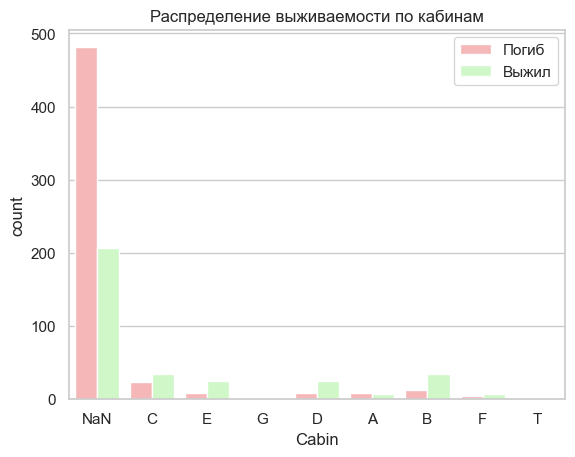

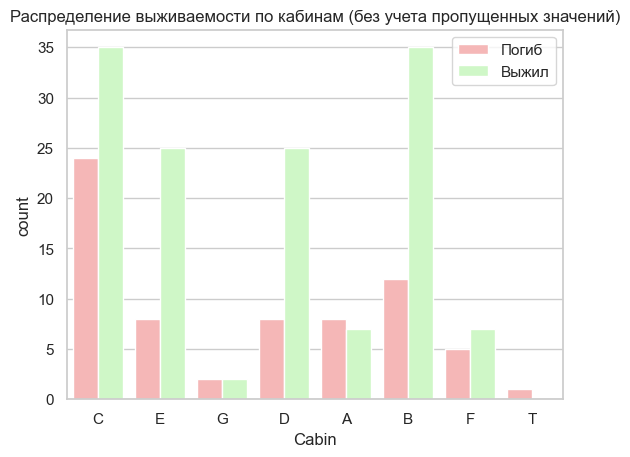

In [23]:
sns.countplot(data=data, x='Cabin', hue='Survived', palette=['#ffadad', '#caffbf'])
plt.legend(loc='upper right', labels=['Погиб', 'Выжил'])
plt.title('Распределение выживаемости по кабинам')
plt.show()

sns.countplot(data=data[data['Cabin'] != 'NaN'], x='Cabin', hue='Survived', palette=['#ffadad', '#caffbf'])
plt.legend(loc='upper right', labels=['Погиб', 'Выжил'])
plt.title('Распределение выживаемости по кабинам (без учета пропущенных значений)')
plt.show()

Само по себе наличие кабины указывает на то, что человек с большим шансом выжил

In [24]:
data['Cabin'] = data['Cabin'].apply(lambda x: 0 if x == 'NaN' else 1)

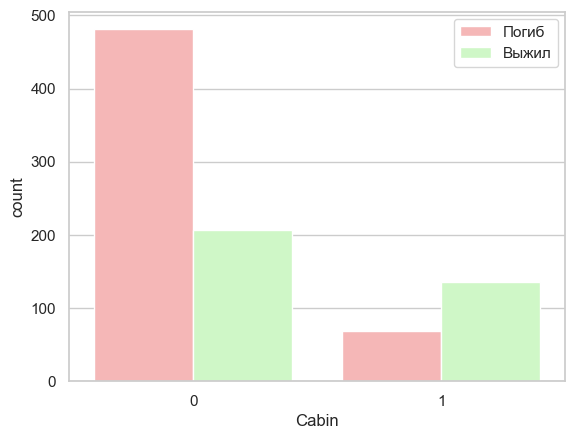

In [25]:
sns.countplot(data=data, x='Cabin', hue='Survived', palette=['#ffadad', '#caffbf'])
plt.legend(loc='upper right', labels=['Погиб', 'Выжил'])

In [26]:
data[(data['SibSp'] == 0)&(data['Age'] < 15)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,0,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,0,S
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,0,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.00,0,2,315153,22.0250,0,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,1,S
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.00,0,2,C.A. 31921,26.2500,0,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,0,C
419,420,0,3,"Van Impe, Miss. Catharina",female,10.00,0,2,345773,24.1500,0,S
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,1,S
446,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.00,0,1,250644,19.5000,0,S


Параметры Parch и SibSp содержат информацию о родственниках на борту. Очевидно, что если запись содержит Parch со значением > 2, то это взрослый, поэтому используя это можно восстановить часть данных возраста. Можно перебрать очевидные комбинации:<br>
<ol>
<li>SibSp > 1 => ребенок</li>
<li>SibSp = 1 => это может быть как ребенок, у которого 1 брат/сестра, так и взрослый, плывущий с супругой/супругом</li>
<li>SibSp = 0 => это может быть как ребенок, если у него нет братьев/сестер, так и взрослый, который едет один или только с детьми</li>
<li>Parch > 2 => взрослый</li>
<li>Parch = 1 => возможно, когда едут 1 родитель и 1 ребенок обработать можно, но сложно (аналогично, если Parch = 2)</li>
<li>Parch = 0 => вообще, это должен быть взрослый, но встречаются записи, с детским возрастом (я вижу два варианта: либо это ошибки данных при сборе, либо дети едут не с родителями, например, с няней или одни)</li>
</ol><br>
Теперь стоит проверить медианы по пунктам 1, 4 и 6. Их придется обрабатывать отдельно.

In [27]:
data[(data['Age'].isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,0,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,0,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,0,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,0,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,0,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,0,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,0,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,0,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,0,S


In [28]:
print(f"Медиана Age для записей с Parch > 2: {data[(data['Parch'] > 2)]['Age'].median()}")
print(f"Медиана Age для записей с SibSp > 1: {data[(data['SibSp'] > 1)]['Age'].median()}")
print(f"Медиана Age для записей с Parch == 0: {data[(data['Parch'] == 0)]['Age'].median()}")

Медиана Age для записей с Parch > 2: 39.0
Медиана Age для записей с SibSp > 1: 11.0
Медиана Age для записей с Parch == 0: 30.0


In [29]:
# Восстановление пропущенных значений в колонке 'Age'

indexes = data[(data['Parch'] > 2)&(data['Age'].isna())].index
data.loc[indexes, 'Age'] = data.loc[indexes, 'Age'].fillna(data[(data['Parch'] > 2)]['Age'].median())

indexes = data[(data['SibSp'] > 1)&(data['Age'].isna())].index
data.loc[indexes, 'Age'] = data.loc[indexes, 'Age'].fillna(data[(data['SibSp'] > 1)]['Age'].median())

indexes = data[(data['Parch'] == 0)&(data['Age'].isna())].index
data.loc[indexes, 'Age'] = data.loc[indexes, 'Age'].fillna(data[(data['Parch'] == 0)]['Age'].median())

data['Age'] = data['Age'].fillna(15)

<h3><strong>Результаты по блоку:</strong></h3>
<ol>
    <li>Теперь можно попробовать повышать качество модели с помощью информации о каюте</li>
    <li>Можно попробовать восстанавить возраст по данным о членах семьи на борту</li>
</ol>